# I] Import and options


In [32]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [33]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [34]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [35]:
path = "huh7/"

# II] DL data

## A) Vala's paper - not ATG7(2)

In [53]:
df_dmso = pandas.read_csv(input_file_directory + path + 'wb_autophagy_huh7_dmso.csv', sep = ";")
df_baf = pandas.read_csv(input_file_directory + path + 'wb_autophagy_huh7_baf.csv', sep = ";")
df_baf

,index,p62,LC3B
0,EV,"1,106373","1,037221"
1,EV,"1,595065","1,457244"
2,EV,"1,470336","1,88375"
3,ATG7(1),"1,140870185","1,164705183"
4,ATG7(1),"1,668648386","1,730769231"
5,ATG7(1),"1,456575312","1,044656859"
6,ATG7(2),"1,344851","1,135892"
7,ATG7(2),"1,764774","0,953419"
8,ATG7(2),"0,911437","0,717232"


     index proteins     value
0       EV      p62  0.923832
1       EV      p62  1.422752
2       EV      p62  1.109325
3  ATG7(1)      p62  1.141205
4  ATG7(1)      p62  1.186552
5  ATG7(1)      p62  1.299101
6  ATG7(2)      p62  1.348038
7  ATG7(2)      p62  1.271984
8  ATG7(2)      p62  0.701340
9       EV     LC3B  0.597200
     index proteins     value
0       EV      p62  1.106373
1       EV      p62  1.595065
2       EV      p62  1.470336
3  ATG7(1)      p62  1.140870
4  ATG7(1)      p62  1.668648
5  ATG7(1)      p62  1.456575
6  ATG7(2)      p62  1.344851
7  ATG7(2)      p62  1.764774
8  ATG7(2)      p62  0.911437
9       EV     LC3B  1.037221


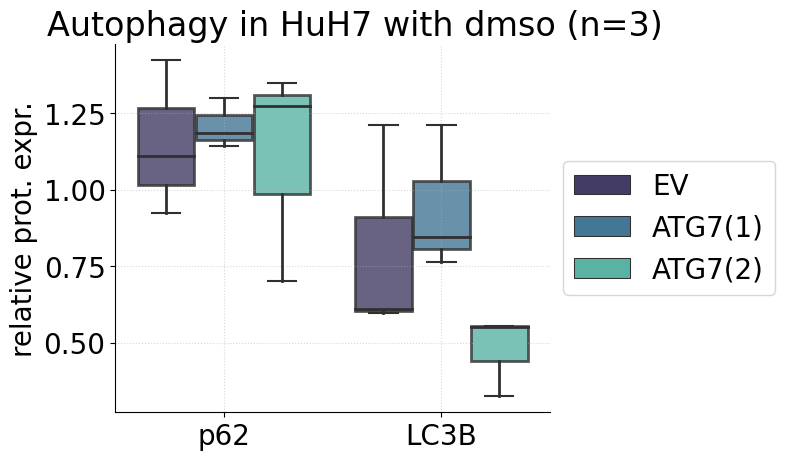

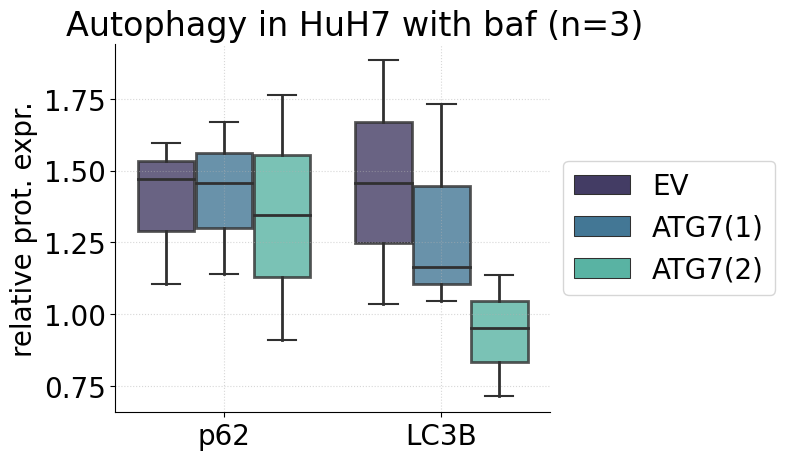

In [65]:
# Distribution: Data preparation + graph
dfs = df_dmso, df_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    Info = infos[i]
    #convert "," to "."
    df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.replace(',','.'))
    #from wide to long df
    df = df.melt(id_vars=["index"], var_name="proteins")
    df['value'] = df['value'].astype(float)
    print(df.head(10))
    
    #graph
    seaborn.catplot(x="proteins", y="value", hue="index", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.title('Autophagy in HuH7 with '+ Info + ' (n=3)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))

    #save
    path2 = 'ATG7/HuH7/Western_blot/'
    plt.savefig(output_file_directory+path2+'ATG7_autophagy_huh7_'+Info+'.svg')

In [64]:
#Statistics T-test for the means of two independent samples
dfs = df_dmso, df_baf
infos = 'dmso', 'baf'
proteins = 'p62', 'LC3B'

for i in range(len(dfs)) :
    df = dfs[i]
    Info = infos[i]
      
    # Stats of all compare to MEF WT
    ev_label = df.iloc[0]['index']
    iso1_label = df.loc[3]['index']
    iso2_label = df.iloc[6]['index']
    
    df_ev = df.iloc[:3, 1:].astype(float)
    df_iso1 = df.iloc[3:6, 1:].astype(float)
    df_iso2 = df.iloc[6:, 1:].astype(float)
    
    print(Info.upper())
    for protein in proteins:
        print(protein.upper())
        ###ATG7-/-
        statistic, pvalue = scipy.stats.ttest_ind(df_iso1[protein], df_ev[protein])
        print("the pvalue between", iso1_label, "and", ev_label,"is", "{:.5E}".format(pvalue))
        ###ATG7
        statistic, pvalue = scipy.stats.ttest_ind(df_iso2[protein], df_ev[protein])
        print("the pvalue between", iso2_label, "and", ev_label,"is", "{:.5E}".format(pvalue))
        ###delVSR
        statistic, pvalue = scipy.stats.ttest_ind(df_iso1[protein], df_iso2[protein])
        print("the pvalue between", iso1_label, "and", iso2_label,"is", "{:.5E}".format(pvalue))
    print('\n')

DMSO
P62
the pvalue between ATG7(1) and EV is 7.28415E-01
the pvalue between ATG7(2) and EV is 8.66710E-01
the pvalue between ATG7(1) and ATG7(2) is 6.52196E-01
LC3B
the pvalue between ATG7(1) and EV is 6.13200E-01
the pvalue between ATG7(2) and EV is 2.03344E-01
the pvalue between ATG7(1) and ATG7(2) is 4.22466E-02


BAF
P62
the pvalue between ATG7(1) and EV is 8.89351E-01
the pvalue between ATG7(2) and EV is 8.69400E-01
the pvalue between ATG7(1) and ATG7(2) is 7.92302E-01
LC3B
the pvalue between ATG7(1) and EV is 6.74837E-01
the pvalue between ATG7(2) and EV is 1.27182E-01
the pvalue between ATG7(1) and ATG7(2) is 1.96110E-01


